In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Linear Regression - Single feature

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/housing.csv")

In [ ]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset.corr() #analizing correlation between features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [ ]:
X=dataset['households'].values.reshape(-1,1) 
y=dataset['population'].values.reshape(-1,1) 

In [ ]:
np.shape(X)

(20640, 1)

In [ ]:
np.shape(y)

(20640, 1)

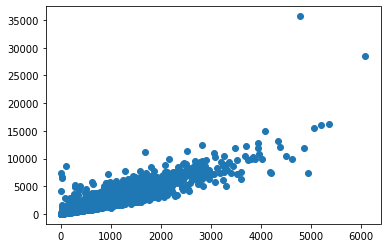

In [ ]:
plt.scatter(X,y)

(array([1.5581e+04, 4.1440e+03, 6.5000e+02, 1.5900e+02, 5.9000e+01,
        2.3000e+01, 1.3000e+01, 6.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 6.0910e+02, 1.2172e+03, 1.8253e+03, 2.4334e+03,
        3.0415e+03, 3.6496e+03, 4.2577e+03, 4.8658e+03, 5.4739e+03,
        6.0820e+03]),
 <a list of 10 Patch objects>)

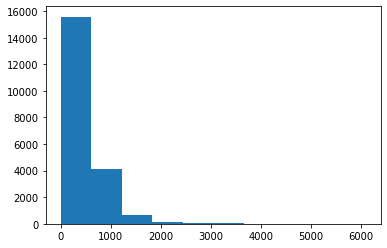

In [ ]:
plt.hist(X) #histogram of households

In [ ]:
X.min()

1.0

In [ ]:
X.max()

6082.0

In [ ]:
X=(X-X.mean())/X.std() #normalization

(array([1.5581e+04, 4.1440e+03, 6.5000e+02, 1.5900e+02, 5.9000e+01,
        2.3000e+01, 1.3000e+01, 6.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([-1.30398368,  0.2865667 ,  1.87711707,  3.46766745,  5.05821782,
         6.64876819,  8.23931857,  9.82986894, 11.42041932, 13.01096969,
        14.60152007]),
 <a list of 10 Patch objects>)

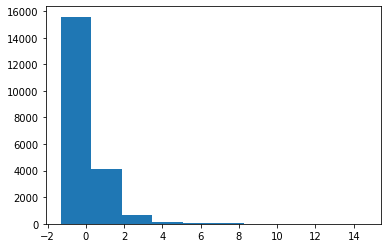

In [ ]:
plt.hist(X)

In [ ]:
X=(X-X.min())/(X.max()-X.min()) #Min-max normalization

(array([1.5581e+04, 4.1440e+03, 6.5000e+02, 1.5900e+02, 5.9000e+01,
        2.3000e+01, 1.3000e+01, 6.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

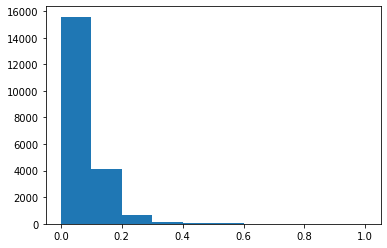

In [ ]:
plt.hist(X)

In [ ]:
theta0=0 #Intercept
theta1=0 #Slope
alpha=0.001 #learning rate
epochs=10000 #iterations

In [ ]:
m=X.shape[0] #number of samples; rows
n=X.shape[1] #features; columns

In [ ]:
cost=np.ones(epochs) #initiazlization of cost
cost

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
#Gradient descent
for i in range(epochs):
  h=theta1*X + theta0 #hypothesis, atm predicted X
  D_theta1=(-2/m)*sum(X*(y-h)) #derivative of ocst fn with respect to theta1
  D_theta0=(-2/m)*sum(y-h) #-||- to theta0
  theta1=theta1-alpha*D_theta1
  theta0=theta0-alpha*D_theta0
  cost[i]=(1/m)*0.5*sum(np.square(h-y)) #computing the cost fn
print(theta1, theta0)
print(cost)

[1027.36996156] [1425.47674131]
[1657196.13512597 1651027.36409117 1644883.24346542 ...  113459.63993057
  113459.63993057  113459.63993057]


Text(0, 0.5, 'cost')

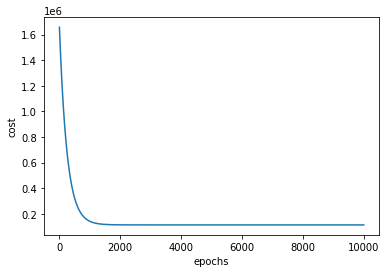

In [ ]:
#plotting cost fn
cost=list(cost)
epochs=[x for x in range(1, epochs+1)]
plt.plot(epochs, cost)
plt.xlabel('epochs')
plt.ylabel('cost')

In [ ]:
h=theta1*X+theta0 #updating hypothesis

Text(0, 0.5, 'Population')

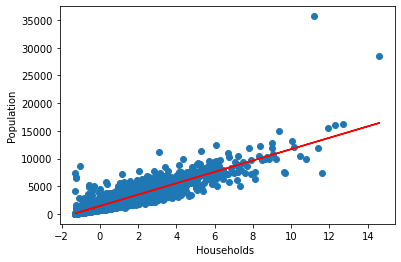

In [ ]:
#households relative to populaqtion
plt.scatter(X,y)
plt.plot(X,h,color='red')
plt.xlabel('Households ')
plt.ylabel('Population')

#Linear Regression - Multivariate

In [ ]:
X=dataset.loc[:, dataset.columns != 'total_bedrooms']
y=dataset.loc[:, dataset.columns == 'total_bedrooms']

In [ ]:
X=X.drop(columns=['longitude','latitude','ocean_proximity'])

In [ ]:
X

,housing_median_age,total_rooms,population,households,median_income,median_house_value
0,41.0,880.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...
20635,25.0,1665.0,845.0,330.0,1.5603,78100.0
20636,18.0,697.0,356.0,114.0,2.5568,77100.0
20637,17.0,2254.0,1007.0,433.0,1.7000,92300.0
20638,18.0,1860.0,741.0,349.0,1.8672,84700.0


In [ ]:
np.shape(X)

(20640, 6)

In [ ]:
np.shape(y)

(20640, 1)

In [ ]:
#pandas to numpy
X=X.to_numpy(dtype=int)
y=y.to_numpy(dtype=int)

In [ ]:
X

array([[    41,    880,    322,    126,      8, 452600],
       [    21,   7099,   2401,   1138,      8, 358500],
       [    52,   1467,    496,    177,      7, 352100],
       ...,
       [    17,   2254,   1007,    433,      1,  92300],
       [    18,   1860,    741,    349,      1,  84700],
       [    16,   2785,   1387,    530,      2,  89400]])

In [ ]:
m=X.shape[0]
n=X.shape[1]

In [ ]:
print(m)
print(n)

20640
6


In [ ]:
#multiplication of matrix and vector
def dot(M,v):
  u=[]
  for i in range(len(M)):
    temp=0.0
    for j in range(len(M[0])):
      temp=temp+(M[i][j]*v[j])
    u.append(temp)
  return u

In [ ]:
#transposition of matrix
def transpose(M):
  N=[]
  for j in range(len(M[0])):
    U=[]
    for i in range(len(M)):
      U.append(M[i][j])
    N.append(U)
  return np.array(N)

In [ ]:
#feature normalization
mean=np.ones(n)
std=np.ones(m)
for i in range(n):
  mean[i]=np.mean(transpose(X)[i])
  std[i]=np.std(transpose(X)[i])
  for j in range(0,m):
    X[j][i]=(X[j][i]-mean[i])/std[i]

In [ ]:
#compute hypothesis
def hypothesis(theta,X,n,m):
  h=np.ones((m,1))
  theta=theta.reshape(1,n+1)
  for i in range(0,m):
    h[i]=dot(theta,X[i])
  h=h.reshape(m)
  return h

In [ ]:
#batch gradient descent
def batchGradientDescent(theta,alpha,epochs,h,X,y,n,m):
  cost=np.ones(epochs)
  for i in range(0,epochs):
    theta[0]=theta[0]-(alpha*(2/m))*np.sum(h-y) #calculating bias
    for j in range(1,n+1):
      theta[j]=theta[j]-(alpha*(2/m))*np.sum((h-y)*transpose(X)[j]) #calculating weights
    h=hypothesis(theta,X,n,m) #update hypothesis
    cost[i]=(1/m)*0.5*np.sum(np.square(h-y)) #update cost function
  theta=theta.reshape(1,n+1)
  return theta, cost

In [ ]:
#linear regression
def linearRegression(X,y,alpha,epochs,n,m):
  bias=np.ones((m,1)) #X0 (first column, bias)
  X=np.concatenate((bias,X),axis=1) #merge feature X0 and other features
  theta=np.zeros(n+1) #weight initialization
  h=hypothesis(theta,X,n,m) #hypothesis init
  theta,cost=batchGradientDescent(theta,alpha,epochs,h,X,y,n,m) #computing GD so I can update theta and cost
  return theta,cost

In [ ]:
alpha=0.00001
epochs=1000

In [ ]:
theta,cost=linearRegression(X,y,alpha,epochs,n,m)

Text(0, 0.5, 'cost')

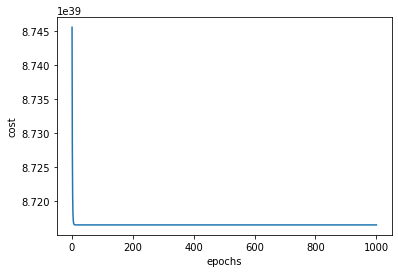

In [ ]:
#cost
cost=list(cost)
epochs=[x for x in range(1,epochs+1)]
plt.plot(epochs, cost)
plt.xlabel('epochs')
plt.ylabel('cost')

#Linear Regression - Normal Equation

In [ ]:
#normal equation
X=dataset['households'].values.reshape(-1,1) 
y=dataset['population'].values.reshape(-1,1) 

In [ ]:
X=(X-X.mean())/X.std()

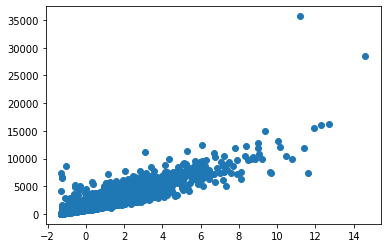

In [ ]:
plt.scatter(X,y)

In [ ]:
X_bias=np.ones((len(X),1)) #bias, column of ones
np.shape(X_bias)

(20640, 1)

In [ ]:
X=X.reshape(len(X),1) #reshape X
np.shape(X)

(20640, 1)

In [ ]:
X2=np.concatenate((X_bias,X),axis=1) #merging bias and X
np.shape(X2)

(20640, 2)

In [ ]:
XT=np.transpose(X2)
XT

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-0.97703285,  1.66996103, -0.84363692, ..., -0.17404163,
        -0.39375258,  0.07967221]])

In [ ]:
XT_dot_X=XT.dot(X2) #multiplication
XT_dot_X

array([[2.06400000e+04, 1.93622895e-12],
       [1.93622895e-12, 2.06400000e+04]])

In [ ]:
temp1 = np.linalg.inv(XT_dot_X)
temp1

array([[ 4.84496124e-05, -4.54503597e-21],
       [-4.54503597e-21,  4.84496124e-05]])

In [ ]:
temp2 = XT.dot(y)
temp2

array([[29421840.        ],
       [21204916.04938793]])

In [ ]:
theta = temp1.dot(temp2)
theta

array([[1425.47674419],
       [1027.36996363]])

In [ ]:
h=theta[0]+theta[1]*X2
h

array([[2452.84670782,  421.70253675],
       [2452.84670782, 3141.14454434],
       [2452.84670782,  558.74951539],
       ...,
       [2452.84670782, 1246.67160427],
       [2452.84670782, 1020.94716886],
       [2452.84670782, 1507.32958326]])

Text(0, 0.5, 'Population')

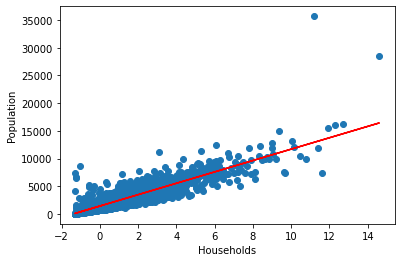

In [ ]:
plt.scatter(X,y)
plt.plot(X2,h,color='red')
plt.xlabel('Households')
plt.ylabel('Population')

#Logistic Regression

In [4]:
from sklearn.datasets import load_wine

 ['alcohol',
                     'malic_acid',
                     'ash',
                     'alcalinity_of_ash',
                     'magnesium',
                     'total_phenols',
                     'flavanoids',
                     'nonflavanoid_phenols',
                     'proanthocyanins',
                     'color_intensity',
                     'hue',
                     'od280/od315_of_diluted_wines',
                     'proline']

In [ ]:
wine=load_wine()
X=wine.data
y=wine.target

In [ ]:
X=(X-X.min())/(X.max()-X.min()) #Min-max normalization
X

array([[8.39350664e-03, 9.40548971e-04, 1.36915357e-03, ...,
        5.41708585e-04, 2.25612696e-03, 6.33900242e-01],
       [7.78036396e-03, 9.82218862e-04, 1.19652116e-03, ...,
        5.47661426e-04, 1.94657920e-03, 6.24970980e-01],
       [7.75655259e-03, 1.32748367e-03, 1.51202176e-03, ...,
        5.35755743e-04, 1.80966384e-03, 7.05334341e-01],
       ...,
       [7.82203385e-03, 2.47042926e-03, 1.26795526e-03, ...,
        2.73830713e-04, 8.51256347e-04, 4.96984886e-01],
       [7.76250543e-03, 1.46439903e-03, 1.33343652e-03, ...,
        2.79783555e-04, 8.86973397e-04, 4.99961307e-01],
       [8.33397822e-03, 2.36327811e-03, 1.55369165e-03, ...,
        2.85736396e-04, 8.75067714e-04, 3.33281742e-01]])

In [ ]:
m=X.shape[0]
n=X.shape[1]

In [ ]:
print(m)
print(n)

123840
1


In [ ]:
#sigmoid activation function
def sigmoid(z):
  return 1. / (1+np.exp(-z))

In [ ]:
#initialization of theta and theta0(bias)
def initTheta(n):
  theta = np.zeros([n, 1])
  theta0=0.0
  return theta, theta0

In [ ]:
#frwd prop of logistic regression
def frwdPropLR(theta, theta0, X_train, y_train, lambda_):
  z=np.dot(np.transpose(theta), X_train) #hypothesis
  h=sigmoid(z) #bounded hypothesis

  reg = lambda_ * np.sum(theta**2) #regularization
  cost = -y_train*np.log(h) - (1-y_train)*np.log(1-h) #cost function
  cost = ((np.sum(cost)) + reg)/X_train.shape[1] 

  derivative_weight = ((np.dot(X_train, ((h-y_train).T))) / X_train.shape[1]) #derivative with respect to theta
  derivative_bias = np.sum(h-y_train)/X_train.shape[1] 

  gradients={'derivative_weight': derivative_weight, 'derivative_bias': derivative_bias} #dict of derivatives

  return cost, gradients


In [ ]:
#updating parameters

def updateParameters(theta, theta0, X_train, y_train, alpha, epochs, lambda_):
  cost_list=[]
  cost_list2=[]
  index=[]

  for i in range(epochs):
    cost, gradients=frwdPropLR(theta, theta0, X_train, y_train, lambda_)
    cost_list.append(cost)

    theta=(theta * (1 - (alpha * lambda_)/m)) - (alpha * gradients['derivative_weight'] + ((lambda_) * np.sum(theta))/m) #updating theta(weight)
    theta0=theta0 - alpha*gradients['derivative_bias'] #updating bias

    if i%10==0: #every 10th cost input in new cost list
      cost_list2.append(cost)
      index.append(i)

  parameters = {'weight': theta, 'bias': theta0} #dict of weight and bias
  plt.plot(index, cost_list2)
  plt.ylabel('cost')
  plt.xlabel('epochs')
  plt.title("Learning rate =" + str(alpha))

  return parameters, gradients, cost_list

In [ ]:
#Logistic regression function with regularization

def regulizedLRModel(X_train, y_train, alpha, epochs, lambda_):
  theta, theta0 = initTheta(X_train.shape[1])
  parameters, gradients, cost_list = updateParameters(theta0, theta, X_train, y_train, alpha, epochs, lambda_)
  return parameters, gradients, cost_list

In [ ]:
#prediction function

def predict(theta, theta0, X_test):
  z=sigmoid(np.dot(theta.T, X_test)) #hypothesis
  y_predict = np.zeros((1, X_test.shape[1])) #size is number of samples of the test set, but X_test is transposed

  for i in range(z.shape[1]):
    if z[0, i] >= 0.5: #if probability is greater that 0.5 that y_predict is 1, otherwise 0
      y_predict[0,i]=1
    else:
      y_predict[0,i]=0
    return y_predict

In [ ]:
alpha=0.2
epochs = 5000
lambda_=0.0001 #regularization

###zeroth class

In [ ]:
y0=(y != 0)*1 #other classes put to be 1

In [ ]:
y0

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X, y0, test_size=0.20, shuffle=True) #splitting the data into train and test

In [ ]:
y0_train = y0_train.reshape(-1, 1)
y0_test = y0_test.reshape(-1, 1)

In [ ]:
X0_train = X0_train.T
X0_test = X0_test.T
y0_test = y0_test.T
y0_train = y0_train.T

In [ ]:
print(X0_train.shape)
print(X0_test.shape)
print(y0_train.shape)
print(y0_test.shape)

(13, 142)
(13, 36)
(1, 142)
(1, 36)


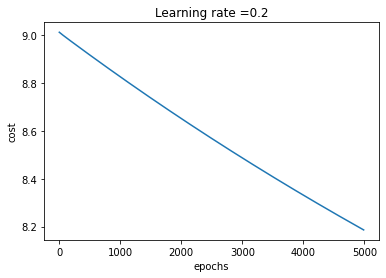

In [ ]:
parameters0, gradients0, cost_list0 = regulizedLRModel(X0_train, y0_train, alpha, epochs, lambda_)

predict zeroth class

In [ ]:
#optimum bias and weight
theta0 = parameters0['bias']
theta = parameters0['weight']

In [ ]:
print(np.shape(theta0))
print(np.shape(theta))

(142, 1)
(13, 13)


In [ ]:
y0_pred = predict(theta, theta0, X0_test)

In [ ]:
y0_test = y0_test.reshape(-1,)
y0_pred = y0_pred.reshape(-1,)

In [ ]:
print(np.shape(y0_test))
print(np.shape(y0_pred))

(36,)
(36,)


In [ ]:
print('Prediction of zeroth class: {:.2f}%'.format(sum(y0_pred == y0_test) / len(y0_test) * 100))

Prediction of zeroth class: 30.56%


First class

In [ ]:
y1 = (y != 1) * 1
y1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.20, shuffle=True)

In [ ]:
y1_train = y1_train.reshape(-1, 1)
y1_test = y1_test.reshape(-1, 1)

In [ ]:
X1_train = X1_train.T
X1_test = X1_test.T
y1_test = y1_test.T
y1_train = y1_train.T

In [ ]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(13, 142)
(13, 36)
(1, 142)
(1, 36)


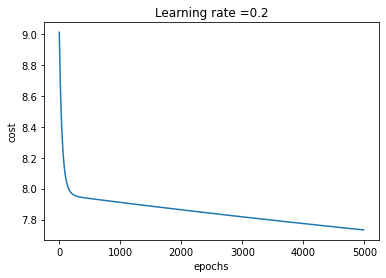

In [ ]:
parameters1, gradients1, cost_list1 = regulizedLRModel(X1_train, y1_train, alpha, epochs, lambda_)

Predict first class

In [ ]:
theta0=parameters1['bias']
theta = parameters1['weight']

In [ ]:
print(np.shape(theta0))
print(np.shape(theta))

(142, 1)
(13, 13)


In [ ]:
y1_pred = predict(theta, theta0, X1_test)

In [ ]:
y1_test = y1_test.reshape(-1,)
y1_pred = y1_pred.reshape(-1,)

In [ ]:
print(np.shape(y1_test))
print(np.shape(y1_pred))

(36,)
(36,)


In [ ]:
print('Prediction of first class: {:.2f}%'.format(sum(y1_pred==y1_test)/len(y1_test)* 100))

Prediction of first class: 41.67%


second class

In [ ]:
y2 = (y != 2) * 1
y2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.20, shuffle=True)

In [ ]:
y2_train = y2_train.reshape(-1, 1)
y2_test = y2_test.reshape(-1, 1)

In [ ]:
X2_train = X2_train.T
X2_test = X2_test.T
y2_test = y2_test.T
y2_train = y2_train.T

In [ ]:
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(13, 142)
(13, 36)
(1, 142)
(1, 36)


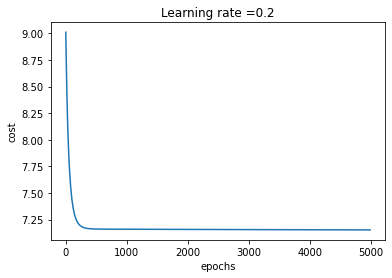

In [ ]:
parameters2, gradients2, cost_list2 = regulizedLRModel(X2_train, y2_train, alpha, epochs, lambda_)

Predict second class

In [ ]:
theta0 = parameters2['bias']
theta = parameters2['weight']

In [ ]:
print(np.shape(theta0))
print(np.shape(theta))

(142, 1)
(13, 13)


In [ ]:
y2_pred = predict(theta, theta0, X2_test)

In [ ]:
y2_test = y2_test.reshape(-1,)
y2_pred = y2_pred.reshape(-1,)

In [ ]:
print(np.shape(y2_test))
print(np.shape(y2_pred))

(36,)
(36,)


In [ ]:
print('Prediction of second class: {:.2f}%'.format(sum(y2_pred == y2_test) / len(y2_test) * 100))

Prediction of second class: 27.78%


Summarized:

In [ ]:
print('Prediction of zeroth class: {:.2f}%'.format(sum(y0_pred == y0_test) / len(y0_test) * 100))
print('Prediction of first class: {:.2f}%'.format(sum(y1_pred == y1_test) / len(y1_test) * 100))
print('Prediction of second class: {:.2f}%'.format(sum(y2_pred == y2_test) / len(y2_test) * 100))

Prediction of zeroth class: 30.56%
Prediction of first class: 41.67%
Prediction of second class: 27.78%


#sklearn prediction

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model0 = LogisticRegression().fit(X0_train.T, y0_train.T)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model0.score(X0_train.T, y0_train.T)

0.9014084507042254

In [ ]:
model1 = LogisticRegression().fit(X1_train.T, y1_train.T)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model1.score(X1_train.T, y1_train.T)

0.7605633802816901

In [ ]:
model2 = LogisticRegression().fit(X2_train.T, y2_train.T)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model2.score(X2_train.T, y2_train.T)

0.7394366197183099

#Neural Networks

In [ ]:
from sklearn.datasets import load_boston
from math import exp
from random import seed
from random import random

In [ ]:
def initializeNetwork(inputNumber, hiddenNUmber, outputNumber):
	network = list()
	hiddenLayer = [{'weights':[random() for i in range(inputNumber + 1)]} for i in range(hiddenNUmber)] 
	network.append(hiddenLayer)
	outputLayer = [{'weights':[random() for i in range(hiddenNUmber + 1)]} for i in range(outputNumber)]
	network.append(outputLayer)
	return network

In [ ]:
def sigmoid(z):
	return 1.0 / (1.0 + exp(-z))
def sigmoidDerivative(output):
  return output*(1.0-output)
def activate(weights, inputs):
  z = weights[-1]
  for i in range(len(weights)-1):
    z += weights[i] * inputs[i]
  return z

In [ ]:
def forwardPropagate(network, sample):
	inputs = sample
	for layer in network:
		newInputs = []
		for neuron in layer:
			z = activate(neuron['weights'], inputs)
			neuron['output'] = sigmoid(z)
			newInputs.append(neuron['output'])
		inputs = newInputs
	return inputs

In [ ]:
def backPropagateError(network,y):
  for i in reversed(range(len(network))):
    layer=network[i]
    errors=list()
    if i!=len(network)-1:
      for j in range(len(layer)):
        error=0.0
        for neuron in network[i+1]:
          error=error+neuron['weights'][j]*neuron['delta']
          errors.append(error)
    else:
      for j in range(len(layer)):
        neuron=layer[j]
        errors.append(y[j]-neuron['output'])
    for j in range(len(layer)):
      neuron=layer[j]
      neuron['delta']=errors[j]*sigmoidDerivative(neuron['output'])

In [ ]:
def updateWeights(network, sample, alpha):
	for i in range(len(network)):
		inputs = sample[:-1]
		if i != 0:
			inputs = [neuron['output'] for neuron in network[i - 1]]
		for neuron in network[i]:
			for j in range(len(inputs)):
				neuron['weights'][j]=neuron['weights'][j]+alpha * neuron['delta'] * inputs[j]
			neuron['weights'][-1]=neuron['weights'][-1]+ alpha * neuron['delta']

In [ ]:
def trainNetwork(network, train, alpha, epochs, outputNumber):
  for instance in range(epochs):
    errorSum = 0
    for sample in train:
      outputs = forwardPropagate(network, sample)
      y = [0 for i in range(outputNumber)]
      y[int(sample[-1])] = 1
      errorSum += sum([(y[i]-outputs[i])**2 for i in range(len(y))])
      backPropagateError(network, y)
      updateWeights(network, sample, alpha)
    print('Instane:',instance,'Learning rate:',alpha,', error %.2f:'%errorSum)

In [ ]:
def predict(network,sample):
  outputs=forwardPropagate(network,sample)
  return outputs.index(max(outputs))

In [ ]:
X=(X-X.min())/(X.max()-X.min()) #minmax normalization
XTrain, XTest, yTrain, yTest = train_test_split( X, y, test_size = 0.15)

In [ ]:
wine=load_wine()
X=wine.data
y=wine.target
X=(X-X.min())/(X.max()-X.min()) #minmax normalization
XTrain, XTest, yTrain, yTest = train_test_split( X, y, test_size = 0.15)

In [ ]:
trainDataset=np.c_[XTrain,yTrain]
testDataset=np.c_[XTest,yTest]

In [ ]:
seed(1)
inputNumber=len(trainDataset[0])-1
outputNumber=len(set([sample[-1] for sample in trainDataset]))
hiddenNumber=len(yTrain)//(5*(inputNumber-outputNumber))
network=initializeNetwork(inputNumber, hiddenNumber, outputNumber)
alpha=0.3
epochs=10000

In [ ]:
trainNetwork(network,trainDataset,alpha,epochs,outputNumber)
for layer in network:
  print(layer)

Streaming output truncated to the last 5000 lines.
Instane: 5002 Learning rate: 0.3 , error 48.98:
Instane: 5003 Learning rate: 0.3 , error 48.98:
Instane: 5004 Learning rate: 0.3 , error 48.98:
Instane: 5005 Learning rate: 0.3 , error 48.98:
Instane: 5006 Learning rate: 0.3 , error 48.98:
Instane: 5007 Learning rate: 0.3 , error 48.98:
Instane: 5008 Learning rate: 0.3 , error 48.98:
Instane: 5009 Learning rate: 0.3 , error 48.98:
Instane: 5010 Learning rate: 0.3 , error 48.98:
Instane: 5011 Learning rate: 0.3 , error 48.98:
Instane: 5012 Learning rate: 0.3 , error 48.98:
Instane: 5013 Learning rate: 0.3 , error 48.98:
Instane: 5014 Learning rate: 0.3 , error 48.98:
Instane: 5015 Learning rate: 0.3 , error 48.98:
Instane: 5016 Learning rate: 0.3 , error 48.98:
Instane: 5017 Learning rate: 0.3 , error 48.98:
Instane: 5018 Learning rate: 0.3 , error 48.98:
Instane: 5019 Learning rate: 0.3 , error 48.98:
Instane: 5020 Learning rate: 0.3 , error 48.98:
Instane: 5021 Learning rate: 0.3 , er

In [ ]:
for sample in testDataset:
  prediction=predict(network,sample)
  print(int(sample[-1]), prediction)

2 2
0 0
0 0
1 1
0 0
1 1
1 2
2 1
2 2
1 2
2 2
0 0
2 2
1 1
2 1
1 2
1 1
1 1
1 1
1 0
2 1
1 1
0 0
2 2
1 1
1 2
1 2


#Kmeans

In [27]:
wine = load_wine()
X=wine.data
y=wine.target

In [28]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [29]:
X.shape

(178, 13)

In [30]:
X = X[:, [1, 3]]

In [31]:
m=X.shape[0] #setting the number of examples
n=X.shape[1] #setting the number of features

In [32]:
n #'malic_acid', 'ash'

2

In [33]:
m

178

<function matplotlib.pyplot.show>

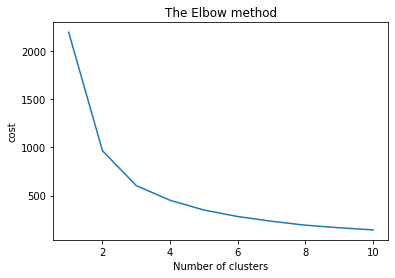

In [34]:
#Using the elbow method to find the optimal number of clusters 
from sklearn.cluster import KMeans
cost=[]
for k in range (1,11):
    kmeans = KMeans (n_clusters= k, init= 'k-means++',random_state= 42)
    kmeans.fit(X)
    cost.append(kmeans.inertia_)
plt.plot(range(1,11),cost)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('cost')
plt.show

In [35]:
K=3 #number of clusters 
iterations=10000 #number of iterations

In [36]:
centroids=np.zeros([n*K]) 
centroids=centroids.reshape(n,K)

In [37]:
np.shape(centroids)

(2, 3)

In [38]:
import random
for k in range(K): 
    rand=random.randint(0,m-1) 
    #data index is randomly generated,
    # but limited by the lower bound of 0 
    #and the upper bound of the indexes of m (examples)
    centroids[:,k]=X[rand]

In [39]:
centroids

array([[ 1.35,  1.72,  4.1 ],
       [16.  , 17.  , 24.5 ]])

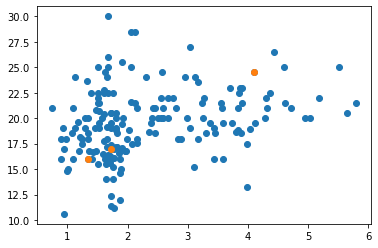

In [40]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centroids[0,:],centroids[1,:]) #showing the first position of the centroids

In [41]:
EuclidianDistance=np.zeros([m*K])
EuclidianDistance=EuclidianDistance.reshape(m,K)
EuclidianDistance

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0

In [42]:
for i in range (iterations):
   for k in range(K):
       tempDist=np.sum((X-centroids[:,k])**2,axis=1) #distance between each sample and each cluster
       EuclidianDistance[:,k]=tempDist
EuclidianDistance

array([[2.896000e-01, 1.960100e+00, 8.492210e+01],
       [2.322490e+01, 3.364360e+01, 1.822724e+02],
       [7.780100e+00, 2.969600e+00, 3.783760e+01],
       [1.000000e+00, 9.290000e-02, 6.391250e+01],
       [2.653760e+01, 1.675690e+01, 1.453010e+01],
       [8.081000e-01, 3.241600e+00, 9.196560e+01],
       [2.230400e+00, 5.782500e+00, 1.029829e+02],
       [3.200000e+00, 5.449000e-01, 5.141250e+01],
       [4.084100e+00, 9.006400e+00, 1.163016e+02],
       [0.000000e+00, 1.136900e+00, 7.981250e+01],
       [4.656100e+00, 1.193600e+00, 4.601360e+01],
       [6.569000e-01, 9.760000e-02, 6.615440e+01],
       [1.444000e-01, 1.000100e+00, 7.786690e+01],
       [2.130440e+01, 3.136010e+01, 1.772269e+02],
       [1.627040e+01, 2.502250e+01, 1.612229e+02],
       [1.651600e+00, 4.810000e-02, 5.853410e+01],
       [1.632490e+01, 9.040000e+00, 2.500240e+01],
       [1.604840e+01, 9.022500e+00, 2.665090e+01],
       [3.076000e-01, 2.669000e-01, 7.030010e+01],
       [3.702500e+00, 5.144400e

In [43]:
C=np.argmin(EuclidianDistance,axis=1)+1 
#for each sample return the cluster number (columns) for which we have minimum distance

In [44]:
C

array([1, 1, 2, 2, 3, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 3, 1, 2, 2, 1, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 3, 3, 3, 2, 1, 1, 2, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3,
       3, 3, 2, 3, 2, 2, 2, 2, 3, 1, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2,
       2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2,
       2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2,
       2, 3])

In [45]:
#indexes of all the samples in each cluster
C1indexes=np.where(C==1)
C2indexes=np.where(C==2)
C3indexes=np.where(C==3)

In [46]:
C3indexes #listing the indexes in the cluster number 3

(array([  4,  25,  30,  71,  72,  73,  79,  82,  83,  86,  87,  88,  89,
         91,  96, 102, 105, 107, 111, 114, 115, 117, 121, 122, 123, 124,
        125, 126, 127, 128, 129, 132, 133, 136, 137, 139, 140, 142, 145,
        147, 148, 149, 150, 151, 152, 155, 157, 158, 159, 160, 162, 164,
        165, 166, 168, 169, 173, 174, 177]),)

In [49]:
#Grouping of the samples based on the cluster they were assigned to 
Cluster1=X[C1indexes]
Cluster2=X[C2indexes]
Cluster3=X[C3indexes]

In [50]:
#finding the mean value for each cluster 
C1mean=Cluster1.mean(axis=0)
C2mean=Cluster2.mean(axis=0)
C3mean=Cluster3.mean(axis=0)

In [51]:
C3mean

array([ 2.89050847, 23.11864407])

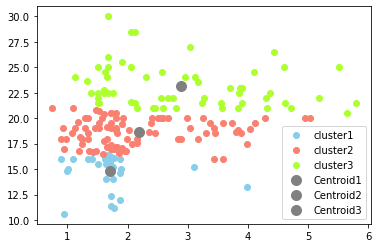

In [52]:
color=['skyblue','salmon','greenyellow','gold']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
plt.scatter(Cluster1[:,0],Cluster1[:,1],c=color[0],label=labels[0])
plt.scatter(Cluster2[:,0],Cluster2[:,1],c=color[1],label=labels[1])
plt.scatter(Cluster3[:,0],Cluster3[:,1],c=color[2],label=labels[2])

plt.scatter(C1mean[0],C1mean[1],s=100,c='gray',label='Centroid1')
plt.scatter(C2mean[0],C2mean[1],s=100,c='gray',label='Centroid2')
plt.scatter(C3mean[0],C3mean[1],s=100,c='gray',label='Centroid3')


plt.legend()
#printed for one feature